<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/AutoTS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 3.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [ ]:
# finaldf = pd.read_csv('predictions.csv')

In [ ]:
ticker = '^BSESN'
df = yf.download(ticker, start = '2022-01-01')
# ,start='2020-01-01'

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,58310.089844,59266.390625,58306.449219,59183.218750,59183.218750,8200
1,2022-01-04,59343.789062,59937.328125,59084.398438,59855.929688,59855.929688,9100
2,2022-01-05,59921.980469,60332.718750,59661.378906,60223.148438,60223.148438,8600
3,2022-01-06,59731.750000,59781.859375,59290.578125,59601.839844,59601.839844,6000
4,2022-01-07,59776.101562,60130.179688,59401.441406,59744.648438,59744.648438,8300


In [ ]:
df.sort_values('Date', inplace = True)

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
101,2022-06-01,55588.269531,55791.488281,55091.429688,55381.171875,55381.171875,7300
102,2022-06-02,55382.441406,55891.921875,55135.109375,55818.109375,55818.109375,5900
103,2022-06-03,56245.601562,56432.648438,55719.359375,55769.230469,55769.230469,5900
104,2022-06-06,55610.640625,55832.281250,55295.738281,55675.320312,55675.320312,4300
105,2022-06-07,55373.179688,55387.769531,54882.410156,55078.300781,55078.300781,0


In [ ]:
# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
# %matplotlib notebook

In [ ]:
split = int(round(len(df)*0.8,0))
train_data = df.iloc[:split]
test_data = df.iloc[split:]

In [ ]:
split

85

## Forecasting using Auto TS

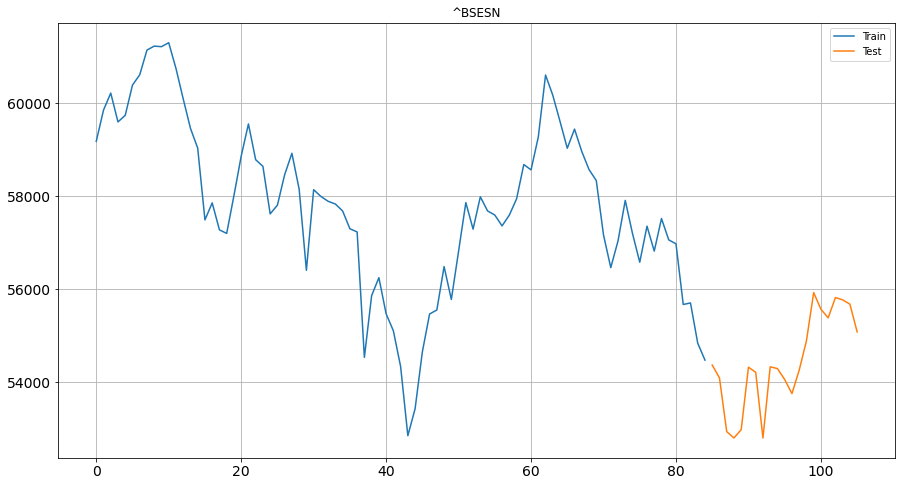

In [ ]:
train_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Train')
test_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 470 kB 2.3 MB/s 


In [ ]:
from autots import AutoTS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = AutoTS(forecast_length=3, frequency='infer',  ensemble='simple', drop_data_older_than_periods=200 )

In [ ]:
mod = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

Inferred frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
4/4 [==============================] - 14s 14ms/step - loss: 0.3678
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3622
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.3610
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.3629
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.3607
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.3521
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.3515
Epoch 8/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3462
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: 0.3388
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 0.3353
Epoch 11/50
4/4 [==============================] - 0s 12ms/step - loss: 0.3295
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 30 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 31 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


Model Number: 32 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 32: MultivariateRegression
Model Number: 33 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 33: DatepartRegression
Model Number: 34 with model SeasonalNaive in generation 0 of 10
Model Number: 35 with model DatepartRegression in generation 0 of 10
Model Number: 36 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 36: UnobservedComponents
Model Number: 37 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 37: UnobservedComponents
Model Number: 38 with

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model FBProphet in generation 0 of 10
Model Number: 49 with model SeasonalNaive in generation 0 of 10
Model Number: 50 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 51 with model NVAR in generation 0 of 10
Model Number: 52 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 52: Theta
Model Number: 53 with model ConstantNaive in generation 0 of 10
Model Number: 54 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 54: LastValueNaive
Model Number: 55 with model AverageValueNaive in generation 0 of 10
Model Number: 56 with model GLS in generation 0 of 10
Model Number: 57 with model SeasonalNaive in generation 0 of 10
Model Number: 58 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 58: GLM
Model Number: 59 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 60 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 61 with model UnobservedComponents in generation 0 of 10
Model Number: 62 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 62: VAR
Model Number: 63 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 63: VECM
Model Number: 64 with model WindowRegression in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 64: WindowRegression
Model Number: 65 with model DatepartRegression in generation 0 of 10
Model Number: 66 with model MultivariateRegression in generation 0 of 10
Model Number: 67 with model UnivariateMotif in generation 0 of 10
Model Number: 68 with model MultivariateMotif in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model NVAR in generation 0 of 10
Model Number: 71 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFound

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 101 with model ConstantNaive in generation 0 of 10
Model Number: 102 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 103 with model ConstantNaive in generation 0 of 10
Model Number: 104 with model DatepartRegression in generation 0 of 10
Epoch 1/50
2/2 [==============================] - 6s 16ms/step - loss: 276.5635
Epoch 2/50
2/2 [==============================] - 0s 14ms/step - loss: 108.8427
Epoch 3/50
2/2 [==============================] - 0s 14ms/step - loss: 202.4949
Epoch 4/50
2/2 [==============================] - 0s 14ms/step - loss: 137.0704
Epoch 5/50
2/2 [==============================] - 0s 17ms/step - loss: 115.0793
Epoch 6/50
2/2 [==============================] - 0s 14ms/step - loss: 133.0414
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 184.6912
Epoch 8/50
2/2 [==============================] - 0s 15ms/step - loss: 113.7403
Epoch 9/50
2/2 [==============================] - 0s 22ms/step - loss: 122.9453
Epoch 10/50
2/2 [==============================] - 0s 16ms/step - loss: 134.2621
Epoch 11/50
2/2 [==============================] - 0s 15ms/step 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 104: DatepartRegression
Model Number: 105 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 106 with model FBProphet in generation 0 of 10
Model Number: 107 with model MultivariateRegression in generation 0 of 10
Model Number: 108 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 108: Theta
Model Number: 109 with model MultivariateRegression in generation 0 of 10
Model Number: 110 with model LastValueNaive in generation 0 of 10
Model Number: 111 with model GLS in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 113: DatepartRegression
Model Number: 114 with model GLS in generation 0 of 10
Model Number: 115 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model GLS in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 123: SectionalMotif
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 126: VAR
Model Number: 127 with model LastValueNaive in generation 0 of 10
Model Number: 128 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (97)') in model 128: UnivariateMotif
Model Number: 129 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the c

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 147 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 147: ARDL
Model Number: 148 with model LastValueNaive in generation 0 of 10
Model Number: 149 with model ConstantNaive in generation 0 of 10


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 150 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 150: VECM
Model Number: 151 with model NVAR in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 151: NVAR
Model Number: 152 with model NVAR in generation 0 of 10
New Generation: 1 of 10
Model Number: 153 with model UnivariateMotif in generation 1 of 10
Model Number: 154 with model UnivariateMotif in generation 1 of 10
Model Number: 155 with model UnivariateMotif in generation 1 of 10
Model Number: 156 with model UnivariateMotif in generation 1 of 10
Model Number: 157 with model NVAR in generation 1 of 10
Model Number: 158 with model NVAR in generation 1 of 10
Model Number: 159 with model NVAR in generation 1 of 10
Model Number: 160 with model NVAR in generation 1 of 10
Model Number: 161 with model MultivariateMotif in generation 1 of 10
Model Number: 162 with model MultivariateMotif in generation 1 of 10
Temp

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 173 with model LastValueNaive in generation 1 of 10
Model Number: 174 with model LastValueNaive in generation 1 of 10
Model Number: 175 with model LastValueNaive in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.616e+01, tolerance: 5.571e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.194e+06, tolerance: 1.938e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 176 with model UnobservedComponents in generation 1 of 10
Model Number: 177 with model UnobservedComponents in generation 1 of 10
Model Number: 178 with model UnobservedComponents in generation 1 of 10
Model Number: 179 with model AverageValueNaive in generation 1 of 10
Model Number: 180 with model AverageValueNaive in generation 1 of 10
Model Number: 181 with model AverageValueNaive in generation 1 of 10
Model Number: 182 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 183 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 184 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 185 with model ETS 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 190 with model MultivariateRegression in generation 1 of 10
Model Number: 191 with model MultivariateRegression in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 192 with model MultivariateRegression in generation 1 of 10
Model Number: 193 with model SeasonalNaive in generation 1 of 10
Model Number: 194 with model SeasonalNaive in generation 1 of 10
Model Number: 195 with model SeasonalNaive in generation 1 of 10
Model Number: 196 with model SeasonalNaive in generation 1 of 10
Model Number: 197 with model SectionalMotif in generation 1 of 10
Model Number: 198 with model SectionalMotif in generation 1 of 10
Model Number: 199 with model SectionalMotif in generation 1 of 10
Model Number: 200 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 200: SectionalMotif
Model Number: 201 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 201: FBProphet
Model Number: 202 with model FBProphet in generation 1 of 10
Template Eval Error: ValueErro

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 205 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 205: GLM
Model Number: 206 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 206: GLM
Model Number: 207 with model GLM in generation 1 of 10
Model Number: 208 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 208: GLM
Model Number: 209 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 209: VAR
Model Number: 2

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 252: UnobservedComponents
Model Number: 253 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 253: UnobservedComponents
Model Number: 254 with model UnobservedComponents in generation 2 of 10
Model Number: 255 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 256 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 257 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 258 with model SectionalMotif in generation 2 of 10
Model Number: 259 with model SectionalMotif in generation 2 of 10
Template Eval Error: Val

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 271 with model MultivariateRegression in generation 2 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Model Number: 272 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 272: MultivariateRegression
Model Number: 273 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 273: FBProphet
Model Number: 274 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 275 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 276 with model FBProphet in generation 2 of 10
Model Number: 277 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 277: GLM
Model Number: 278 with model GLM in generation 2 of 10
Model Number: 279 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 279: GLM
Model Number: 280 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 280: GLM
Model Number: 281 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 312 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 313 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 313: MultivariateRegression
Model Number: 314 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 315 with model AverageValueNaive in generation 3 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 316 with model AverageValueNaive in generation 3 of 10
Model Number: 317 with model AverageValueNaive in generation 3 of 10
Model Number: 318 with model ConstantNaive in generation 3 of 10
Model Number: 319 with model ConstantNaive in generation 3 of 10
Model Number: 320 with model ConstantNaive in generation 3 of 10
Model Number: 321 with model GLS in generation 3 of 10
Model Number: 322 with model GLS in generation 3 of 10
Model Number: 323 with model LastValueNaive in generation 3 of 10
Model Number: 324 with model LastValueNaive in generation 3 of 10
Model Number: 325 with model LastValueNaive in generation 3 of 10
Model Number: 326 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 326: DatepartRegression
Model Number: 327 with model DatepartRegression in generation 3 of 10
Model Number: 328 with model DatepartRegression in generation 3 of 10
Epoch 1/50
3/3 [==============================

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+08, tolerance: 4.933e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 333 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 333: WindowRegression
Model Number: 334 with model WindowRegression in generation 3 of 10
Template Eval Error: LinAlgError("The kernel, ExpSineSquared(length_scale=1, periodicity=1), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '5-th leading minor of the array is not positive definite') in model 334: WindowRegression
Model Number: 335 with model WindowRegression in generation 3 of 10
Model Number: 336 with model SeasonalNaive in generation 3 of 10
Model Number: 337 with model SeasonalNaive in generation 3 of 10
Model Number: 338 with model SeasonalNaive in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 339 with model SeasonalNaive in generation 3 of 10
Model Number: 340 with model SectionalMotif in generation 3 of 10
Model Number: 341 with model SectionalMotif in generation 3 of 10
Model Number: 342 with model SectionalMotif in generation 3 of 10
Model Number: 343 with model SectionalMotif in generation 3 of 10
Model Number: 344 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 345 with model FBProphet in generation 3 of 10
Model Number: 346 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 346: FBProphet
Model Number: 347 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 347: FBProphet
Model Number: 348 with model GLM in generation 3 of 10
Model Number: 349 with model GLM in generation 3 of 10
Model Number: 350 with model GLM in generation 3 of 10
Model Number: 351 with model GLM in generation 3 of 10
Model Number: 352 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 352: VAR
Model Number: 353 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 353: VAR
Model Number: 354 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only ga

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 358 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 358: VECM
Model Number: 359 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 359: ARDL
Model Number: 360 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 360: ARDL
Model Number: 361 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 361: ARDL
Model Number: 362 with model ARDL in generation 3 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 362: ARDL
Model Nu

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 385 with model MultivariateRegression in generation 4 of 10
Model Number: 386 with model AverageValueNaive in generation 4 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 387 with model AverageValueNaive in generation 4 of 10
Model Number: 388 with model AverageValueNaive in generation 4 of 10
Model Number: 389 with model ConstantNaive in generation 4 of 10
Model Number: 390 with model ConstantNaive in generation 4 of 10
Model Number: 391 with model ConstantNaive in generation 4 of 10
Model Number: 392 with model LastValueNaive in generation 4 of 10
Model Number: 393 with model LastValueNaive in generation 4 of 10
Model Number: 394 with model LastValueNaive in generation 4 of 10
Model Number: 395 with model GLS in generation 4 of 10
Model Number: 396 with model GLS in generation 4 of 10
Model Number: 397 with model GLS in generation 4 of 10
Model Number: 398 with model WindowRegression in generation 4 of 10
Model Number: 399 with model WindowRegression in generation 4 of 10
Model Number: 400 with model WindowRegression in generation 4 of 10
Model Number: 401 with model DatepartRegression in generation 4 of 10
Model Number: 402 with model D

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.752e-02, tolerance: 3.258e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 405 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 406 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 407 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('could not broadcast input array from shape (115,) into shape (370,)')
Model Number: 408 with model SeasonalNaive in generation 4 of 10
Model Number: 409 with model SeasonalNaive in generation 4 of 10
Model Number: 410 with model SeasonalNaive in generation 4 of 10
Model Number: 411 with model SeasonalNaive in generation 4 of 10
Model Number: 412 with model SectionalMotif in generation 4 of 10
Model Number: 413 with model SectionalMotif in generation 4 of 10
Model Number: 414 with model SectionalMotif in generation 4 of 10
Model Number: 415 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 417 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Model Number: 418 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 419 with model FBProphet in generation 4 of 10
Model Number: 420 with model GLM in generation 4 of 10
Model Number: 421 with model GLM in generation 4 of 10
Model Number: 422 with model GLM in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 423 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 423: GLM
Model Number: 424 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 424: VAR
Model Number: 425 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 425: VAR
Model Number: 426 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 426: VAR
Model Number: 427 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 427: VAR
Model Number: 428 with model VECM in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 428: VECM
Model Number: 429 with model VECM in generation 4 of 10
Template Eval Error: ValueE

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 433 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 433: ARDL
Model Number: 434 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 434: ARDL
Model Number: 435 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 435: ARDL
Model Number: 436 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 436: Theta
Model Number: 437 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 437: Theta
Model Number: 438 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodel

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 460 with model MultivariateRegression in generation 5 of 10
Model Number: 461 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 461: MultivariateRegression
Model Number: 462 with model AverageValueNaive in generation 5 of 10
Model Number: 463 with model AverageValueNaive in generation 5 of 10
Model Number: 464 with model AverageValueNaive in generation 5 of 10
Model Number: 465 with model LastValueNaive in generation 5 of 10
Model Number: 466 with model LastValueNaive in generation 5 of 10
Model Number: 467 with model LastValueNaive in generation 5 of 10
Model Number: 468 with model GLS in generation 5 of 10
Model Number: 469 with model GLS in generation 5 of 10
Model Number: 470 with model WindowRegression in generation 5 of 10
Model Number: 471 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a valu

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 474 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 474: DatepartRegression
Model Number: 475 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 475: DatepartRegression
Model Number: 476 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 477 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 478 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 479 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 480 with model SeasonalNaive in generation 5 o

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 489 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Model Number: 490 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 491 with model FBProphet in generation 5 of 10
Model Number: 492 with model GLM in generation 5 of 10
Model Number: 493 with model GLM in generation 5 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 493: GLM
Model Number: 494 with model GLM in generation 5 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 494: GLM
Model Number: 495 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 495: GLM
Model Number: 496 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 496: VAR
Model Number: 497 with model VAR in gene

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 504: ARDL
Model Number: 505 with model ARDL in generation 5 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 505: ARDL
Model Number: 506 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 506: ARDL
Model Number: 507 with model ARDL in generation 5 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 507: ARDL
Model Number: 508 with model Theta in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 508: Theta
Model Number: 509 with model Theta in 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.421e+00, tolerance: 1.095e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 546 with model WindowRegression in generation 6 of 10
Model Number: 547 with model WindowRegression in generation 6 of 10
Model Number: 548 with model WindowRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 549 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 550 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 551 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 552 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 553 with model SeasonalNaive in generation 6 of 10
Model Number: 554 with model SeasonalNaive in generation 6 of 10
Model Number: 555 with model SeasonalNaive in generation 6 of 10
Model Number: 556 with model SeasonalNaive in generation 6 of 10
Model Number: 557 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Model Number: 558 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 559 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 560 with model FBProphet in generation 6 of 10
Model Number: 561 with model SectionalMotif in generation 6 of 10
Model Number: 562 with model SectionalMotif in generation 6 of 10
Model Number: 563 with model SectionalMotif in generation 6 of 10
Model Number: 564 with model SectionalMotif in generation 6 of 10
Model Number: 565 with model GLM in generation 6 of 10
Model Number: 566 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 566: GLM
Model Number: 567 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 567: GLM
Model Number: 568 with model GLM in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis

Model Number: 569 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 569: VAR
Model Number: 570 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 570: VAR
Model Number: 571 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 571: VAR
Model Number: 572 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 572: VAR
Model Number: 573 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 573: VECM
Model Number: 574 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 574: VECM
Model Number: 575 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 575: VECM
Model Number: 576 with mo

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 607 with model AverageValueNaive in generation 7 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 608 with model AverageValueNaive in generation 7 of 10
Model Number: 609 with model AverageValueNaive in generation 7 of 10
Model Number: 610 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 610: DatepartRegression
Model Number: 611 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 611: DatepartRegression
Model Number: 612 with model DatepartRegression in generation 7 of 10
Model Number: 613 with model LastValueNaive in generation 7 of 10
Model Number: 614 with model LastValueNaive in generation 7 of 10
Model Number: 615 with model LastValueNaive in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 616 with model GLS in generation 7 of 10
Model Number: 617 with model GLS in generation 7 of 10
Model Number: 618 with model GLS in generation 7 of 10
Model Number: 619 with model WindowRegression in generation 7 of 10
Model Number: 620 with model WindowRegression in generation 7 of 10
Model Number: 621 with model WindowRegression in generation 7 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 622 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 623 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 624 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 625 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 626 with model SeasonalNaive in generation 7 of 10
Model Number: 627 with model SeasonalNaive in generation 7 of 10
Model Number: 628 with model SeasonalNaive in generation 7 of 10
Model Number: 629 with model SeasonalNaive in generation 7 of 10
Model Number: 630 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 631 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 632 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 633 with model FBProphet in generation 7 of 10
Model Number: 634 with model SectionalMotif in generation 7 of 10
Model Number: 635 with model SectionalMotif in generation 7 of 10
Model Number: 636 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (3)') in model 636: SectionalMotif
Model Number: 637 with model SectionalMotif in generation 7 of 10
Model Number: 638 with model GLM in generation 7 of 10
Model Number: 639 with model GLM in generation 7 of 10
Model Number: 640 with model GLM in generation 7 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 640: GLM
Model Number: 641 with model GLM in generation 7 of 10
Model Number: 642 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 642: VAR
Model Number: 643 with model VAR in generation 7 of 10
Te

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError('Only gave one variable to VECM') in model 645: VECM
Model Number: 646 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 646: VECM
Model Number: 647 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 647: VECM
Model Number: 648 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 648: VECM
Model Number: 649 with model ARDL in generation 7 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 649: ARDL
Model Number: 650 with model ARDL in generation 7 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 650: ARDL
Model Number: 651 with model ARDL in

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 679 with model MultivariateRegression in generation 8 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 679: MultivariateRegression
Model Number: 680 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 681 with model MultivariateRegression in generation 8 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 681: MultivariateRegression
Model Number: 682 with model AverageValueNaive in generation 8 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 683 with model AverageValueNaive in generation 8 of 10
Model Number: 684 with model AverageValueNaive in generation 8 of 10
Model Number: 685 with model SectionalMotif in generation 8 of 10
Model Number: 686 with model SectionalMotif in generation 8 of 10
Model Number: 687 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 687: SectionalMotif
Model Number: 688 with model SectionalMotif in generation 8 of 10
Model Number: 689 with model DatepartRegression in generation 8 of 10
Epoch 1/50
6/6 [==============================] - 5s 121ms/step - loss: 651.3146 - val_loss: 580.2471
Epoch 2/50
6/6 [==============================] - 0s 24ms/step - loss: 614.8639 - val_loss: 568.2398
Epoch 3/50
6/6 [==============================] - 0s 21ms/step - loss: 603.0726 - val_loss: 564.1634
Epoch 4/50
6/6 [==============================] - 0s 24ms/step - loss: 595.1629 - val_loss: 559.8862
Epoch 5/50
6/6 [================

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Model Number: 711 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 712 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


Model Number: 713 with model FBProphet in generation 8 of 10
Model Number: 714 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 714: VAR
Model Number: 715 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 715: VAR
Model Number: 716 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 716: VAR
Model Number: 717 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 717: VAR
Model Number: 718 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 718: VECM
Model Number: 719 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 719: VECM
Model Number: 720 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one va

Model Number: 742 with model WindowRegression in generation 9 of 10
Model Number: 743 with model WindowRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Model Number: 744 with model MultivariateMotif in generation 9 of 10
Model Number: 745 with model MultivariateMotif in generation 9 of 10
Model Number: 746 with model MultivariateMotif in generation 9 of 10
Model Number: 747 with model MultivariateMotif in generation 9 of 10
Model Number: 748 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 748: UnobservedComponents
Model Number: 749 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 749: UnobservedComponents
Model Number: 750 with model UnobservedComponents in generation 9 of 10
Model Number: 751 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+08, tolerance: 4.933e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python

Model Number: 752 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.294e+08, tolerance: 4.890e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python

Model Number: 753 with model MultivariateRegression in generation 9 of 10
Model Number: 754 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 755 with model AverageValueNaive in generation 9 of 10
Model Number: 756 with model AverageValueNaive in generation 9 of 10
Model Number: 757 with model AverageValueNaive in generation 9 of 10
Model Number: 758 with model SectionalMotif in generation 9 of 10
Model Number: 759 with model SectionalMotif in generation 9 of 10
Model Number: 760 with model SectionalMotif in generation 9 of 10
Model Number: 761 with model SectionalMotif in generation 9 of 10
Model Number: 762 with model DatepartRegression in generation 9 of 10
Model Number: 763 with model DatepartRegression in generation 9 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 763: DatepartRegression
Model Number: 764 with model DatepartRegression in generation 9 of 10
Epoch 1/100
Template Eval Error: TypeError('in user code:\n\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1021, in train_function  *\n        return step_function(self, iterator)\n

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 780 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 781 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Model Number: 782 with model FBProphet in generation 9 of 10
Model Number: 783 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 783: GLM
Model Number: 784 with model GLM in generation 9 of 10
Model Number: 785 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 785: GLM
Model Number: 786 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 786: VAR
Model Number: 787 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 787: VAR
Model Number: 788 with model VAR in generation 9 of 10
Template Eval Error: Valu

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Template Eval Error: ValueError('Only gave one variable to VECM') in model 790: VECM
Model Number: 791 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 791: VECM
Model Number: 792 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 792: VECM
Model Number: 793 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 793: VECM
Model Number: 794 with model ARDL in generation 9 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 794: ARDL
Model Number: 795 with model ARDL in generation 9 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 795: ARDL
Model Number: 796 with model ARDL in

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 818 with model FBProphet in generation 10 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 818: FBProphet
Model Number: 819 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 820 with model FBProphet in generation 10 of 10
Model Number: 821 with model WindowRegression in generation 10 of 10
Template Eval Error: LightGBMError('Check failed: label > 0 at /__w/1/s/python-package/compile/src/metric/regression_metric.hpp, line 268 .\n') in model 821: WindowRegression
Model Number: 822 with model WindowRegression in generation 10 of 10
Model Number: 823 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 823: WindowRegression
Model Number: 824 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (3, 1), got (3,).') in model 824: UnobservedComponents
Model Number: 825 with model UnobservedComponents in generation 10 of 10
Model Number: 826 with model UnobservedComponents in generation 10 of 10
Model Number: 827 with model MultivariateRegression in gener

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 828 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 828: MultivariateRegression
Model Number: 829 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 830 with model MultivariateRegression in generation 10 of 10
Model Number: 831 with model AverageValueNaive in generation 10 of 10


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 832 with model AverageValueNaive in generation 10 of 10
Model Number: 833 with model AverageValueNaive in generation 10 of 10
Model Number: 834 with model SectionalMotif in generation 10 of 10
Model Number: 835 with model SectionalMotif in generation 10 of 10
Model Number: 836 with model SectionalMotif in generation 10 of 10
Model Number: 837 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 837: SectionalMotif
Model Number: 838 with model DatepartRegression in generation 10 of 10
Epoch 1/50
3/3 [==============================] - 7s 281ms/step - loss: nan - val_loss: nan
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: nan - val_loss: nan
Epoch 3/50
3/3 [==============================] - 0s 36ms/step - loss: nan - val_loss: nan
Epoch 4/50
3/3 [==============================] - 0s 37ms/step - loss: nan - val_loss: nan
Epoch 5/50
3/3 [===================

Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 838: DatepartRegression
Model Number: 839 with model DatepartRegression in generation 10 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 839: DatepartRegression
Model Number: 840 with model DatepartRegression in generation 10 of 10
Epoch 1/100
4/4 [==============================] - 6s 7ms/step - loss: 0.0852
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0856
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0851
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0847
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0853
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0846
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0857
Epoch 8/100
4/4 [==============================] - 0s

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 858 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 859 with model Ensemble in generation 11 of Ensembles
Model Number: 860 with model Ensemble in generation 11 of Ensembles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 861 with model Ensemble in generation 11 of Ensembles
Model Number: 862 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 129 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 0.5: 
Model Number: 2 of 129 with model Ensemble for Validation 1
2 - Ensemble with avg smape 0.51: 
Model Number: 3 of 129 with model Ensemble for Validation 1
3 - Ensemble with avg smape 0.54: 
Model Number: 4 of 129 with model Ensemble for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 4 - Ensemble with avg smape 0.39: 
Model Number: 5 of 129 with model Ensemble for Validation 1
5 - Ensemble with avg smape 0.77: 
Model Number: 6 of 129 with model NVAR for Validation 1
6 - NVAR with avg smape 0.77: 
Model Number: 7 of 129 with model NVAR for Validation 1
7 - NVAR with avg smape 0.77: 
Model Number: 8 of 129 with model Ensemble for Validation 1
8 - Ensemble with avg smape 0.77: 
Model Number: 9 of 129 with model NVAR for Validation 1
9 - NVAR with avg smape 0.77: 
Model Number: 10 of 129 with model NVAR for Validation 1
10 - NVAR with avg smape 0.77: 
Model Number: 11 of 129 with model NVAR for Validation 1
11 - NVAR with avg smape 0.7: 
Model Number: 12 of 129 with model NVAR for Validation 1
12 - NVAR with avg smape 0.75: 
Model Number: 13 of 129 with model NVAR for Validation 1
13 - NVAR with avg smape 0.75: 
Model Number: 14 of 129 with model NVAR for Validation 1
14 - NVAR with avg smape 0.75: 
Model Number: 15 of 129 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


18 - Ensemble with avg smape 0.39: 
Model Number: 19 of 129 with model UnivariateMotif for Validation 1
19 - UnivariateMotif with avg smape 0.42: 
Model Number: 20 of 129 with model MultivariateMotif for Validation 1
20 - MultivariateMotif with avg smape 0.46: 
Model Number: 21 of 129 with model ConstantNaive for Validation 1
21 - ConstantNaive with avg smape 0.47: 
Model Number: 22 of 129 with model UnivariateMotif for Validation 1
22 - UnivariateMotif with avg smape 2.1: 
Model Number: 23 of 129 with model MultivariateMotif for Validation 1
23 - MultivariateMotif with avg smape 0.55: 
Model Number: 24 of 129 with model UnivariateMotif for Validation 1
24 - UnivariateMotif with avg smape 1.49: 
Model Number: 25 of 129 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 25 - FBProphet with avg smape 0.24: 
Model Number: 26 of 129 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


26 - Ensemble with avg smape 0.32: 
Model Number: 27 of 129 with model UnivariateMotif for Validation 1
27 - UnivariateMotif with avg smape 0.42: 
Model Number: 28 of 129 with model ConstantNaive for Validation 1
28 - ConstantNaive with avg smape 3.23: 
Model Number: 29 of 129 with model WindowRegression for Validation 1
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]29 - WindowRegression with avg smape 0.38: 
Model Number: 30 of 129 with model MultivariateMotif for Validation 1
30 - MultivariateMotif with avg smape 0.48: 
Model Number: 31 of 129 with model Unobserved

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


44 - MultivariateRegression with avg smape 0.28: 
Model Number: 45 of 129 with model UnivariateMotif for Validation 1
45 - UnivariateMotif with avg smape 0.42: 
Model Number: 46 of 129 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


46 - UnivariateMotif with avg smape 0.33: 
Model Number: 47 of 129 with model ConstantNaive for Validation 1
47 - ConstantNaive with avg smape 0.49: 
Model Number: 48 of 129 with model UnobservedComponents for Validation 1
48 - UnobservedComponents with avg smape 0.48: 
Model Number: 49 of 129 with model GLS for Validation 1
49 - GLS with avg smape 1.28: 
Model Number: 50 of 129 with model LastValueNaive for Validation 1
50 - LastValueNaive with avg smape 0.37: 
Model Number: 51 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
51 - ETS with avg smape 0.35: 
Model Number: 52 of 129 with model GLS for Validation 1
52 - GLS with avg smape 1.2: 
Model Number: 53 of 129 with model AverageValueNaive for Validation 1
53 - AverageValueNaive with avg smape 0.5: 
Model Number: 54 of 129 with model GLS for Validation 1
54 - GLS with avg smape 0.34: 
Model Number: 55 of 129 with model GLS for Validation 1
55 - GLS with avg s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.636e+01, tolerance: 5.562e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 63 of 129 with model WindowRegression for Validation 1
📈 63 - WindowRegression with avg smape 0.21: 
Model Number: 64 of 129 with model LastValueNaive for Validation 1
64 - LastValueNaive with avg smape 0.33: 
Model Number: 65 of 129 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


65 - MultivariateRegression with avg smape 1.33: 
Model Number: 66 of 129 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


66 - DatepartRegression with avg smape 2.75: 
Model Number: 67 of 129 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


67 - MultivariateRegression with avg smape 0.53: 
Model Number: 68 of 129 with model AverageValueNaive for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


68 - AverageValueNaive with avg smape 0.35: 
Model Number: 69 of 129 with model AverageValueNaive for Validation 1
69 - AverageValueNaive with avg smape 0.56: 
Model Number: 70 of 129 with model LastValueNaive for Validation 1
70 - LastValueNaive with avg smape 0.49: 
Model Number: 71 of 129 with model AverageValueNaive for Validation 1
71 - AverageValueNaive with avg smape 0.51: 
Model Number: 72 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
72 - ETS with avg smape 0.37: 
Model Number: 73 of 129 with model LastValueNaive for Validation 1
73 - LastValueNaive with avg smape 1.53: 
Model Number: 74 of 129 with model AverageValueNaive for Validation 1
74 - AverageValueNaive with avg smape 0.52: 
Model Number: 75 of 129 with model AverageValueNaive for Validation 1
75 - AverageValueNaive with avg smape 2.42: 
Model Number: 76 of 129 with model LastValueNaive for Validation 1
76 - LastValueNaive with avg smape 0.88

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


79 - MultivariateRegression with avg smape 1.45: 
Model Number: 80 of 129 with model WindowRegression for Validation 1
80 - WindowRegression with avg smape 2.56: 
Model Number: 81 of 129 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


81 - MultivariateRegression with avg smape 0.31: 
Model Number: 82 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


82 - ETS with avg smape 0.35: 
Model Number: 83 of 129 with model SeasonalNaive for Validation 1
83 - SeasonalNaive with avg smape 2.67: 
Model Number: 84 of 129 with model UnobservedComponents for Validation 1
84 - UnobservedComponents with avg smape 0.35: 
Model Number: 85 of 129 with model LastValueNaive for Validation 1
85 - LastValueNaive with avg smape 0.61: 
Model Number: 86 of 129 with model UnobservedComponents for Validation 1
86 - UnobservedComponents with avg smape 3.89: 
Model Number: 87 of 129 with model SeasonalNaive for Validation 1
87 - SeasonalNaive with avg smape 0.34: 
Model Number: 88 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
88 - ETS with avg smape 0.37: 
Model Number: 89 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
89 - ETS with avg smape 0.45: 
Model Number: 90 of 129 with model MultivariateRegression for 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.291e+08, tolerance: 4.813e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


90 - MultivariateRegression with avg smape 1.6: 
Model Number: 91 of 129 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


91 - MultivariateRegression with avg smape 0.64: 
Model Number: 92 of 129 with model MultivariateMotif for Validation 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


92 - MultivariateMotif with avg smape 0.29: 
Model Number: 93 of 129 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


93 - MultivariateRegression with avg smape 3.6: 
Model Number: 94 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


94 - ETS with avg smape 0.33: 
Model Number: 95 of 129 with model FBProphet for Validation 1
95 - FBProphet with avg smape 0.5: 
Model Number: 96 of 129 with model GLM for Validation 1
96 - GLM with avg smape 0.56: 
Model Number: 97 of 129 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
97 - ETS with avg smape 0.56: 
Model Number: 98 of 129 with model GLS for Validation 1
98 - GLS with avg smape 0.56: 
Model Number: 99 of 129 with model SeasonalNaive for Validation 1
99 - SeasonalNaive with avg smape 0.9: 
Model Number: 100 of 129 with model SeasonalNaive for Validation 1
100 - SeasonalNaive with avg smape 0.9: 
Model Number: 101 of 129 with model GLS for Validation 1
101 - GLS with avg smape 0.48: 
Model Number: 102 of 129 with model GLS for Validation 1
102 - GLS with avg smape 0.51: 
Model Number: 103 of 129 with model WindowRegression for Validation 1
103 - WindowRegression with avg smape 1.03: 
Model Number: 104 o

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


115 - WindowRegression with avg smape 0.86: 
Model Number: 116 of 129 with model SeasonalNaive for Validation 1
116 - SeasonalNaive with avg smape 0.37: 
Model Number: 117 of 129 with model SectionalMotif for Validation 1


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


117 - SectionalMotif with avg smape 2.05: 
Model Number: 118 of 129 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


118 - FBProphet with avg smape 5.73: 
Model Number: 119 of 129 with model FBProphet for Validation 1
119 - FBProphet with avg smape 5.77: 
Model Number: 120 of 129 with model SeasonalNaive for Validation 1
120 - SeasonalNaive with avg smape 0.39: 
Model Number: 121 of 129 with model SeasonalNaive for Validation 1
121 - SeasonalNaive with avg smape 0.58: 
Model Number: 122 of 129 with model WindowRegression for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122 - WindowRegression with avg smape 1.9: 
Model Number: 123 of 129 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


123 - FBProphet with avg smape 0.91: 
Model Number: 124 of 129 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


124 - FBProphet with avg smape 0.98: 
Model Number: 125 of 129 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


125 - FBProphet with avg smape 0.28: 
Model Number: 126 of 129 with model FBProphet for Validation 1
126 - FBProphet with avg smape 3.84: 
Model Number: 127 of 129 with model GLM for Validation 1
127 - GLM with avg smape 0.8: 
Model Number: 128 of 129 with model GLM for Validation 1
128 - GLM with avg smape 0.74: 
Model Number: 129 of 129 with model GLM for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


129 - GLM with avg smape 1.22: 
Validation Round: 2
Model Number: 1 of 129 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 3.0: 
Model Number: 2 of 129 with model Ensemble for Validation 2
2 - Ensemble with avg smape 3.0: 
Model Number: 3 of 129 with model Ensemble for Validation 2
3 - Ensemble with avg smape 3.02: 
Model Number: 4 of 129 with model Ensemble for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 4 - Ensemble with avg smape 2.94: 
Model Number: 5 of 129 with model Ensemble for Validation 2
5 - Ensemble with avg smape 2.99: 
Model Number: 6 of 129 with model NVAR for Validation 2
6 - NVAR with avg smape 2.99: 
Model Number: 7 of 129 with model NVAR for Validation 2
7 - NVAR with avg smape 2.99: 
Model Number: 8 of 129 with model Ensemble for Validation 2
8 - Ensemble with avg smape 2.99: 
Model Number: 9 of 129 with model NVAR for Validation 2
9 - NVAR with avg smape 2.99: 
Model Number: 10 of 129 with model NVAR for Validation 2
10 - NVAR with avg smape 2.99: 
Model Number: 11 of 129 with model NVAR for Validation 2
📈 11 - NVAR with avg smape 2.92: 
Model Number: 12 of 129 with model NVAR for Validation 2
12 - NVAR with avg smape 3.02: 
Model Number: 13 of 129 with model NVAR for Validation 2
13 - NVAR with avg smape 3.02: 
Model Number: 14 of 129 with model NVAR for Validation 2
14 - NVAR with avg smape 3.02: 
Model Number: 15 of 129 with model UnivariateMotif for Validation

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


18 - Ensemble with avg smape 2.97: 
Model Number: 19 of 129 with model UnivariateMotif for Validation 2
19 - UnivariateMotif with avg smape 3.32: 
Model Number: 20 of 129 with model MultivariateMotif for Validation 2
20 - MultivariateMotif with avg smape 2.97: 
Model Number: 21 of 129 with model ConstantNaive for Validation 2
21 - ConstantNaive with avg smape 2.89: 
Model Number: 22 of 129 with model UnivariateMotif for Validation 2
22 - UnivariateMotif with avg smape 2.66: 
Model Number: 23 of 129 with model MultivariateMotif for Validation 2
23 - MultivariateMotif with avg smape 2.6: 
Model Number: 24 of 129 with model UnivariateMotif for Validation 2
24 - UnivariateMotif with avg smape 2.74: 
Model Number: 25 of 129 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25 - FBProphet with avg smape 2.54: 
Model Number: 26 of 129 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


26 - Ensemble with avg smape 2.43: 
Model Number: 27 of 129 with model UnivariateMotif for Validation 2


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


27 - UnivariateMotif with avg smape 3.21: 
Model Number: 28 of 129 with model ConstantNaive for Validation 2
28 - ConstantNaive with avg smape 3.01: 
Model Number: 29 of 129 with model WindowRegression for Validation 2
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]29 - WindowRegression with avg smape 3.38: 
Model Number: 30 of 129 with model MultivariateMotif for Validation 2
30 - MultivariateMotif with avg smape 2.46: 
Model Number: 31 of 129 with model UnobservedComponents for Validation 2

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


44 - MultivariateRegression with avg smape 3.47: 
Model Number: 45 of 129 with model UnivariateMotif for Validation 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


45 - UnivariateMotif with avg smape 3.25: 
Model Number: 46 of 129 with model UnivariateMotif for Validation 2
46 - UnivariateMotif with avg smape 2.96: 
Model Number: 47 of 129 with model ConstantNaive for Validation 2
47 - ConstantNaive with avg smape 2.52: 
Model Number: 48 of 129 with model UnobservedComponents for Validation 2
48 - UnobservedComponents with avg smape 2.76: 
Model Number: 49 of 129 with model GLS for Validation 2
49 - GLS with avg smape 2.23: 
Model Number: 50 of 129 with model LastValueNaive for Validation 2
50 - LastValueNaive with avg smape 1.18: 
Model Number: 51 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
51 - ETS with avg smape 1.19: 
Model Number: 52 of 129 with model GLS for Validation 2
52 - GLS with avg smape 2.02: 
Model Number: 53 of 129 with model AverageValueNaive for Validation 2
53 - AverageValueNaive with avg smape 2.05: 
Model Number: 54 of 129 with model GLS for Valida

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+01, tolerance: 5.500e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 65 of 129 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


65 - MultivariateRegression with avg smape 1.17: 
Model Number: 66 of 129 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


66 - DatepartRegression with avg smape 1.94: 
Model Number: 67 of 129 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


67 - MultivariateRegression with avg smape 1.19: 
Model Number: 68 of 129 with model AverageValueNaive for Validation 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


68 - AverageValueNaive with avg smape 2.93: 
Model Number: 69 of 129 with model AverageValueNaive for Validation 2
69 - AverageValueNaive with avg smape 2.5: 
Model Number: 70 of 129 with model LastValueNaive for Validation 2
70 - LastValueNaive with avg smape 2.49: 
Model Number: 71 of 129 with model AverageValueNaive for Validation 2
71 - AverageValueNaive with avg smape 2.76: 
Model Number: 72 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
72 - ETS with avg smape 1.21: 
Model Number: 73 of 129 with model LastValueNaive for Validation 2
73 - LastValueNaive with avg smape 3.29: 
Model Number: 74 of 129 with model AverageValueNaive for Validation 2
74 - AverageValueNaive with avg smape 2.59: 
Model Number: 75 of 129 with model AverageValueNaive for Validation 2
75 - AverageValueNaive with avg smape 3.65: 
Model Number: 76 of 129 with model LastValueNaive for Validation 2
76 - LastValueNaive with avg smape 1.19:

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


79 - MultivariateRegression with avg smape 2.27: 
Model Number: 80 of 129 with model WindowRegression for Validation 2
📈 80 - WindowRegression with avg smape 1.04: 
Model Number: 81 of 129 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


81 - MultivariateRegression with avg smape 2.7: 
Model Number: 82 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


82 - ETS with avg smape 1.18: 
Model Number: 83 of 129 with model SeasonalNaive for Validation 2
83 - SeasonalNaive with avg smape 1.74: 
Model Number: 84 of 129 with model UnobservedComponents for Validation 2
84 - UnobservedComponents with avg smape 3.24: 
Model Number: 85 of 129 with model LastValueNaive for Validation 2
85 - LastValueNaive with avg smape 1.18: 
Model Number: 86 of 129 with model UnobservedComponents for Validation 2
86 - UnobservedComponents with avg smape 2.76: 
Model Number: 87 of 129 with model SeasonalNaive for Validation 2
📈 87 - SeasonalNaive with avg smape 0.84: 
Model Number: 88 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
88 - ETS with avg smape 1.6: 
Model Number: 89 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
89 - ETS with avg smape 2.46: 
Model Number: 90 of 129 with model MultivariateRegression for

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.273e+08, tolerance: 4.649e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


90 - MultivariateRegression with avg smape 1.19: 
Model Number: 91 of 129 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


91 - MultivariateRegression with avg smape 1.51: 
Model Number: 92 of 129 with model MultivariateMotif for Validation 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


92 - MultivariateMotif with avg smape 2.16: 
Model Number: 93 of 129 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


93 - MultivariateRegression with avg smape 2.07: 
Model Number: 94 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


94 - ETS with avg smape 1.56: 
Model Number: 95 of 129 with model FBProphet for Validation 2
95 - FBProphet with avg smape 3.0: 
Model Number: 96 of 129 with model GLM for Validation 2
96 - GLM with avg smape 2.49: 
Model Number: 97 of 129 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
97 - ETS with avg smape 2.49: 
Model Number: 98 of 129 with model GLS for Validation 2
98 - GLS with avg smape 2.5: 
Model Number: 99 of 129 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


99 - SeasonalNaive with avg smape 1.44: 
Model Number: 100 of 129 with model SeasonalNaive for Validation 2
100 - SeasonalNaive with avg smape 1.44: 
Model Number: 101 of 129 with model GLS for Validation 2
101 - GLS with avg smape 2.57: 
Model Number: 102 of 129 with model GLS for Validation 2
102 - GLS with avg smape 2.5: 
Model Number: 103 of 129 with model WindowRegression for Validation 2
103 - WindowRegression with avg smape 2.23: 
Model Number: 104 of 129 with model WindowRegression for Validation 2
104 - WindowRegression with avg smape 2.22: 
Model Number: 105 of 129 with model SectionalMotif for Validation 2
105 - SectionalMotif with avg smape 1.39: 
Model Number: 106 of 129 with model WindowRegression for Validation 2
106 - WindowRegression with avg smape 1.36: 
Model Number: 107 of 129 with model DatepartRegression for Validation 2
107 - DatepartRegression with avg smape 2.66: 
Model Number: 108 of 129 with model UnobservedComponents for Validation 2
108 - UnobservedComponen

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


115 - WindowRegression with avg smape 1.23: 
Model Number: 116 of 129 with model SeasonalNaive for Validation 2
116 - SeasonalNaive with avg smape 0.99: 
Model Number: 117 of 129 with model SectionalMotif for Validation 2


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


117 - SectionalMotif with avg smape 3.05: 
Model Number: 118 of 129 with model FBProphet for Validation 2


INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


118 - FBProphet with avg smape 2.82: 
Model Number: 119 of 129 with model FBProphet for Validation 2
119 - FBProphet with avg smape 2.83: 
Model Number: 120 of 129 with model SeasonalNaive for Validation 2
120 - SeasonalNaive with avg smape 1.21: 
Model Number: 121 of 129 with model SeasonalNaive for Validation 2
121 - SeasonalNaive with avg smape 1.8: 
Model Number: 122 of 129 with model WindowRegression for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122 - WindowRegression with avg smape 1.53: 
Model Number: 123 of 129 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


123 - FBProphet with avg smape 0.9: 
Model Number: 124 of 129 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


124 - FBProphet with avg smape 1.18: 
Model Number: 125 of 129 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


125 - FBProphet with avg smape 5.89: 
Model Number: 126 of 129 with model FBProphet for Validation 2
126 - FBProphet with avg smape 5.04: 
Model Number: 127 of 129 with model GLM for Validation 2
127 - GLM with avg smape 2.7: 
Model Number: 128 of 129 with model GLM for Validation 2
128 - GLM with avg smape 1.04: 
Model Number: 129 of 129 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


129 - GLM with avg smape 1.55: 
Validation Round: 3
Model Number: 1 of 129 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 0.72: 
Model Number: 2 of 129 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 0.71: 
Model Number: 3 of 129 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 0.21: 
Model Number: 4 of 129 with model Ensemble for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4 - Ensemble with avg smape 0.38: 
Model Number: 5 of 129 with model Ensemble for Validation 3
5 - Ensemble with avg smape 1.05: 
Model Number: 6 of 129 with model NVAR for Validation 3
6 - NVAR with avg smape 1.06: 
Model Number: 7 of 129 with model NVAR for Validation 3
7 - NVAR with avg smape 1.06: 
Model Number: 8 of 129 with model Ensemble for Validation 3
8 - Ensemble with avg smape 1.06: 
Model Number: 9 of 129 with model NVAR for Validation 3
9 - NVAR with avg smape 1.05: 
Model Number: 10 of 129 with model NVAR for Validation 3
10 - NVAR with avg smape 1.05: 
Model Number: 11 of 129 with model NVAR for Validation 3
11 - NVAR with avg smape 1.0: 
Model Number: 12 of 129 with model NVAR for Validation 3
12 - NVAR with avg smape 1.21: 
Model Number: 13 of 129 with model NVAR for Validation 3
13 - NVAR with avg smape 1.21: 
Model Number: 14 of 129 with model NVAR for Validation 3
14 - NVAR with avg smape 1.21: 
Model Number: 15 of 129 with model UnivariateMotif for Validation 3
15

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


18 - Ensemble with avg smape 1.5: 
Model Number: 19 of 129 with model UnivariateMotif for Validation 3
19 - UnivariateMotif with avg smape 0.33: 
Model Number: 20 of 129 with model MultivariateMotif for Validation 3
20 - MultivariateMotif with avg smape 1.25: 
Model Number: 21 of 129 with model ConstantNaive for Validation 3
21 - ConstantNaive with avg smape 0.2: 
Model Number: 22 of 129 with model UnivariateMotif for Validation 3
22 - UnivariateMotif with avg smape 0.69: 
Model Number: 23 of 129 with model MultivariateMotif for Validation 3
23 - MultivariateMotif with avg smape 0.6: 
Model Number: 24 of 129 with model UnivariateMotif for Validation 3
24 - UnivariateMotif with avg smape 0.47: 
Model Number: 25 of 129 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25 - FBProphet with avg smape 0.69: 
Model Number: 26 of 129 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


26 - Ensemble with avg smape 0.83: 
Model Number: 27 of 129 with model UnivariateMotif for Validation 3
27 - UnivariateMotif with avg smape 0.19: 
Model Number: 28 of 129 with model ConstantNaive for Validation 3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


28 - ConstantNaive with avg smape 0.47: 
Model Number: 29 of 129 with model WindowRegression for Validation 3
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]📈 29 - WindowRegression with avg smape 0.04: 
Model Number: 30 of 129 with model MultivariateMotif for Validation 3
30 - MultivariateMotif with avg smape 0.65: 
Model Number: 31 of 129 with model UnobservedComponents for Validation 3
31 - UnobservedComponents with avg smape 0.94: 
Model Number: 32 of 129 with model ConstantNaive for Validation 3
32 - ConstantNaive with avg smape 0.29: 
Model Number: 33 of 129 with model ConstantNaive for Validation 3
33 - ConstantNaive with avg smape 0.29: 
Model Number: 34 of 129 with model UnobservedComponents for Validation 3
34 - UnobservedComponent

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


44 - MultivariateRegression with avg smape 1.99: 
Model Number: 45 of 129 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


45 - UnivariateMotif with avg smape 0.52: 
Model Number: 46 of 129 with model UnivariateMotif for Validation 3
46 - UnivariateMotif with avg smape 0.19: 
Model Number: 47 of 129 with model ConstantNaive for Validation 3
47 - ConstantNaive with avg smape 0.31: 
Model Number: 48 of 129 with model UnobservedComponents for Validation 3
48 - UnobservedComponents with avg smape 0.44: 
Model Number: 49 of 129 with model GLS for Validation 3
49 - GLS with avg smape 0.94: 
Model Number: 50 of 129 with model LastValueNaive for Validation 3
50 - LastValueNaive with avg smape 2.35: 
Model Number: 51 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
51 - ETS with avg smape 2.33: 
Model Number: 52 of 129 with model GLS for Validation 3
52 - GLS with avg smape 0.66: 
Model Number: 53 of 129 with model AverageValueNaive for Validation 3
53 - AverageValueNaive with avg smape 0.76: 
Model Number: 54 of 129 with model GLS for Valida

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+01, tolerance: 6.639e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 65 of 129 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


65 - MultivariateRegression with avg smape 1.66: 
Model Number: 66 of 129 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


66 - DatepartRegression with avg smape 2.25: 
Model Number: 67 of 129 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


67 - MultivariateRegression with avg smape 2.16: 
Model Number: 68 of 129 with model AverageValueNaive for Validation 3
68 - AverageValueNaive with avg smape 1.59: 
Model Number: 69 of 129 with model AverageValueNaive for Validation 3


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


69 - AverageValueNaive with avg smape 0.39: 
Model Number: 70 of 129 with model LastValueNaive for Validation 3
70 - LastValueNaive with avg smape 0.39: 
Model Number: 71 of 129 with model AverageValueNaive for Validation 3
71 - AverageValueNaive with avg smape 0.25: 
Model Number: 72 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
72 - ETS with avg smape 2.2: 
Model Number: 73 of 129 with model LastValueNaive for Validation 3
73 - LastValueNaive with avg smape 6.02: 
Model Number: 74 of 129 with model AverageValueNaive for Validation 3
74 - AverageValueNaive with avg smape 0.35: 
Model Number: 75 of 129 with model AverageValueNaive for Validation 3
75 - AverageValueNaive with avg smape 0.27: 
Model Number: 76 of 129 with model LastValueNaive for Validation 3
76 - LastValueNaive with avg smape 2.36: 
Model Number: 77 of 129 with model DatepartRegression for Validation 3
77 - DatepartRegression with avg smape 0.2

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


79 - MultivariateRegression with avg smape 0.17: 
Model Number: 80 of 129 with model WindowRegression for Validation 3
80 - WindowRegression with avg smape 2.12: 
Model Number: 81 of 129 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


81 - MultivariateRegression with avg smape 2.14: 
Model Number: 82 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


82 - ETS with avg smape 2.32: 
Model Number: 83 of 129 with model SeasonalNaive for Validation 3
83 - SeasonalNaive with avg smape 0.86: 
Model Number: 84 of 129 with model UnobservedComponents for Validation 3
84 - UnobservedComponents with avg smape 1.44: 
Model Number: 85 of 129 with model LastValueNaive for Validation 3
85 - LastValueNaive with avg smape 2.35: 
Model Number: 86 of 129 with model UnobservedComponents for Validation 3
86 - UnobservedComponents with avg smape 6.83: 
Model Number: 87 of 129 with model SeasonalNaive for Validation 3
87 - SeasonalNaive with avg smape 2.08: 
Model Number: 88 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
88 - ETS with avg smape 3.59: 
Model Number: 89 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
89 - ETS with avg smape 0.33: 
Model Number: 90 of 129 with model MultivariateRegression for 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+08, tolerance: 4.314e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


90 - MultivariateRegression with avg smape 3.36: 
Model Number: 91 of 129 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


91 - MultivariateRegression with avg smape 0.74: 
Model Number: 92 of 129 with model MultivariateMotif for Validation 3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


92 - MultivariateMotif with avg smape 0.1: 
Model Number: 93 of 129 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


93 - MultivariateRegression with avg smape 1.21: 
Model Number: 94 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


94 - ETS with avg smape 3.51: 
Model Number: 95 of 129 with model FBProphet for Validation 3
95 - FBProphet with avg smape 0.15: 
Model Number: 96 of 129 with model GLM for Validation 3
96 - GLM with avg smape 0.39: 
Model Number: 97 of 129 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
97 - ETS with avg smape 0.39: 
Model Number: 98 of 129 with model GLS for Validation 3
98 - GLS with avg smape 0.39: 
Model Number: 99 of 129 with model SeasonalNaive for Validation 3
99 - SeasonalNaive with avg smape 4.59: 
Model Number: 100 of 129 with model SeasonalNaive for Validation 3
100 - SeasonalNaive with avg smape 4.59: 
Model Number: 101 of 129 with model GLS for Validation 3
101 - GLS with avg smape 0.4: 
Model Number: 102 of 129 with model GLS for Validation 3
102 - GLS with avg smape 0.4: 
Model Number: 103 of 129 with model WindowRegression for Validation 3
103 - WindowRegression with avg smape 0.63: 
Model Number: 104 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


115 - WindowRegression with avg smape 1.24: 
Model Number: 116 of 129 with model SeasonalNaive for Validation 3
116 - SeasonalNaive with avg smape 2.11: 
Model Number: 117 of 129 with model SectionalMotif for Validation 3


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


117 - SectionalMotif with avg smape 0.26: 
Model Number: 118 of 129 with model FBProphet for Validation 3


INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


118 - FBProphet with avg smape 1.75: 
Model Number: 119 of 129 with model FBProphet for Validation 3
119 - FBProphet with avg smape 1.78: 
Model Number: 120 of 129 with model SeasonalNaive for Validation 3
120 - SeasonalNaive with avg smape 0.88: 
Model Number: 121 of 129 with model SeasonalNaive for Validation 3
121 - SeasonalNaive with avg smape 1.25: 
Model Number: 122 of 129 with model WindowRegression for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


122 - WindowRegression with avg smape 0.85: 
Model Number: 123 of 129 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


123 - FBProphet with avg smape 1.01: 
Model Number: 124 of 129 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


124 - FBProphet with avg smape 2.42: 
Model Number: 125 of 129 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


125 - FBProphet with avg smape 3.23: 
Model Number: 126 of 129 with model FBProphet for Validation 3
126 - FBProphet with avg smape 3.57: 
Model Number: 127 of 129 with model GLM for Validation 3
127 - GLM with avg smape 1.07: 
Model Number: 128 of 129 with model GLM for Validation 3
128 - GLM with avg smape 2.12: 
Model Number: 129 of 129 with model GLM for Validation 3


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


129 - GLM with avg smape 0.64: 


## Best Model

In [ ]:
print(mod)

Initiated AutoTS object with best model: 
WindowRegression
{'fillna': 'pad', 'transformations': {'0': 'ClipOutliers', '1': 'RobustScaler', '2': 'Detrend', '3': 'Log'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {}}}
{'window_size': 10, 'input_dim': 'univariate', 'output_dim': 'forecast_length', 'normalize_window': False, 'max_windows': 5000, 'regression_type': None, 'regression_model': {'model': 'SVM', 'model_params': {}}}
SMAPE: 0.35019073033226406, 0.20992283622821362, 1.495810234430946, 0.8305903798286329
MAE: 193.95959654826098, 116.79638339055721, 821.0029713671878, 450.2332169836639
SPL: 0.7260273889621773, 0.7318454839719372, 0.6969278389428382, 0.6238628381108936


## Prediction and Forecasting

In [ ]:
pred = model.predict()
forecast = pred.forecast
model_results = model.results()
validation = model.results('validation')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Let’s print the forecast of the dataset for the future stock price. Also, we will see the validation of the model results. 

In [ ]:
# Forecast
print(forecast)

                   Close
2022-06-08  55355.284015
2022-06-09  55352.298006
2022-06-10  54932.345638


In [ ]:
fcast = forecast.astype(int)

In [ ]:
print(ticker)
print(fcast)

^BSESN
            Close
2022-06-08  55355
2022-06-09  55352
2022-06-10  54932


In [ ]:
from datetime import datetime
newdf = pd.DataFrame(fcast)
newdf['ticker'] = ticker
newdf['timestamp'] = datetime.now()

In [ ]:
newdf

,Close,ticker,timestamp
2022-06-06,863,IPCALAB.NS,2022-06-04 09:23:46.563474
2022-06-07,849,IPCALAB.NS,2022-06-04 09:23:46.563474
2022-06-08,843,IPCALAB.NS,2022-06-04 09:23:46.563474


In [ ]:
newdf.reset_index(inplace = True)

In [ ]:
newdf.rename(columns = {'index':'Date'}, inplace = True)
# newdf['Date'] = pd.to_datetime(newdf['Date'])

In [ ]:
newdf

,Date,Close,ticker,timestamp
0,2022-05-31,35441,^NSEBANK,2022-05-30 20:17:03.368617
1,2022-06-01,35744,^NSEBANK,2022-05-30 20:17:03.368617
2,2022-06-02,35735,^NSEBANK,2022-05-30 20:17:03.368617


In [ ]:
# finaldf = pd.DataFrame()
# finaldf = pd.read_csv('predictions.csv')
finaldf = finaldf.append(newdf)

In [ ]:
finaldf

,Date,Close,ticker,timestamp
0,2022-05-30,16090,^NSEI,2022-05-28 11:17:41.393578
1,2022-05-30,34838,^NSEBANK,2022-05-28 21:54:40.944595
2,2022-05-30,54334,^BSESN,2022-05-28 21:58:47.604539
3,2022-05-31,16103,^NSEI,2022-05-28 11:17:41.393578
4,2022-05-31,35056,^NSEBANK,2022-05-28 21:54:40.944595
5,2022-05-31,54221,^BSESN,2022-05-28 21:58:47.604539
0,2022-05-31,16586,^NSEI,2022-05-30 19:27:57.532132
6,2022-06-01,16105,^NSEI,2022-05-28 11:17:41.393578
7,2022-06-01,35216,^NSEBANK,2022-05-28 21:54:40.944595
8,2022-06-01,54123,^BSESN,2022-05-28 21:58:47.604539


In [ ]:
finaldf['Date'] = pd.to_datetime(finaldf['Date'])

In [ ]:
finaldf.sort_values('Date', inplace=True)

In [ ]:
# finaldf['Close'] = (round(finaldf['Close'],0)).astype(int)
finaldf[['Date','Close','ticker']]

,Date,Close,ticker
0,2022-05-30,16090,^NSEI
1,2022-05-30,34838,^NSEBANK
2,2022-05-30,54334,^BSESN
3,2022-05-31,16103,^NSEI
4,2022-05-31,35056,^NSEBANK
5,2022-05-31,54221,^BSESN
0,2022-05-31,16586,^NSEI
0,2022-05-31,35441,^NSEBANK
6,2022-06-01,16105,^NSEI
7,2022-06-01,35216,^NSEBANK


In [ ]:
finaldf['timestamp'] = pd.to_datetime(finaldf['timestamp'])

In [ ]:
finaldf[finaldf['ticker']=='^NSEI'].sort_values('timestamp', ascending=False)

,Date,Close,ticker,timestamp
0,2022-05-31,16586,^NSEI,2022-05-30 19:27:57.532132
1,2022-06-01,16585,^NSEI,2022-05-30 19:27:57.532132
2,2022-06-02,16577,^NSEI,2022-05-30 19:27:57.532132
0,2022-05-30,16090,^NSEI,2022-05-28 11:17:41.393578
3,2022-05-31,16103,^NSEI,2022-05-28 11:17:41.393578
6,2022-06-01,16105,^NSEI,2022-05-28 11:17:41.393578


In [ ]:
finaldf.to_csv('predictions.csv', index=False)

In [ ]:
#Validation Results
# print(validation)